### Термины

EDA (exploratory data analysis) - анализ данных с помощью статистики и визуализации.Основная цель -  "понять" наши данные, найти какие то закономерности, проверить их "качество" (пропуски, аномльные значения). Возможно использование статистического моделирования, но не обязательно. 

### Демонстрация анализа данных на примере набора из mlbootcamp 5
#### "Предсказание сердечно-сосудистых заболеваний"

В рамках конкурса вам нужно предсказать наличие сердечно-сосудистых заболеваний по результатам классического врачебного осмотра. Датасет сформирован из 100.000 реальных клинических анализов, и в нём используются признаки, которые можно разбить на 3 группы:

 

Объективные признаки:

 - Возраст
 - Рост
 - Вес
 - Пол
 

Результаты измерения:

 - Артериальное давление верхнее и нижнее
 - Холестерин
 - Глюкоза
 

Субъективные признаки:

 - Курение
 - Употребление Алкоголя
 - Физическая активность

In [46]:
import pandas as pd # библиотека для работы с наборами данных
import matplotlib.pyplot as plt # библиотека для визуализации
import numpy # структура данных ndarray, статистики (хотя там много всего)

import seaborn as sns # более продвинутая библиотека для визуализации данных
sns.set(style="white", color_codes=True)

# чтобы изображения отображались прямо в ноутбуке
%matplotlib inline 

In [47]:
#считаем данные и посмотрим на первые 5 строк
data = pd.DataFrame.from_csv("./mlbc5full.csv", sep=";")
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,type
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,train
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,train
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,train
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,train
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,train


In [48]:
#пропуски в данных
data.info() #крайне удивительно, но пропусков у нас нет. 
#наличие пропусков добавляет головной боли. Существует множество вариантов работы с пропущенными значениями.
#допустим, что они у нас есть. Как поступать тогда?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 13 columns):
age            100000 non-null int64
gender         100000 non-null int64
height         100000 non-null int64
weight         100000 non-null float64
ap_hi          100000 non-null int64
ap_lo          100000 non-null int64
cholesterol    100000 non-null int64
gluc           100000 non-null int64
smoke          100000 non-null int64
alco           100000 non-null int64
active         100000 non-null int64
cardio         100000 non-null int64
type           100000 non-null object
dtypes: float64(1), int64(11), object(1)
memory usage: 10.7+ MB


In [49]:
#избавимся на ненужных столбцов
data = data.drop('type', 1)

In [50]:
#распределение по полу
data['gender'].value_counts()

1    64918
2    35082
Name: gender, dtype: int64

In [51]:
#общая статистика по каждому столбцу
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,19464.864590,1.350820,164.348140,74.180167,129.253490,96.347990,1.367220,1.225330,0.088270,0.054140,0.804330,0.500000
std,2470.428376,0.477229,8.211187,14.379494,173.639687,181.437372,0.679922,0.570543,0.283689,0.226295,0.396718,0.500003
min,8865.000000,1.000000,50.000000,10.000000,-150.000000,-90.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17662.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19700.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.500000
75%,21324.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Видим множество аномальных значений. Работа с аномальными значениями - серьезная задача, содержащая множество подходов и методов. Например, исправление, замена либо простое игнорирование отдельных наблюдений. Часто выбор зависит от прикладной задачи. Иногда удаление "плохих" наблюдений может быть оправданно, но чаще всего с ними приходится работать.

### Таблицы

In [52]:
#среднее значение cardio в зависимости от уровня холестерина
data.groupby(['gender', 'cholesterol'])['cardio'].aggregate('mean').unstack()

cholesterol,1,2,3
gender,,,
1,0.435320,0.581725,0.769904
2,0.450715,0.638298,0.753049


Похоже, что особой разницы между мужчинами и женщинами нет, но зато заметна разница между теми, у кого холестерин в норме, выше нормы и много выше нормы (что ожидаемо).

In [53]:
#среднее значение cardio в зависимости от уровня сахара
data.groupby(['gender', 'gluc'])['cardio'].aggregate('mean').unstack()

gluc,1,2,3
gender,,,
1,0.476765,0.578677,0.632362
2,0.490059,0.615415,0.590070


Казалось бы логично предположить, что среди людей с сахаром много выше нормы, будет больше больных ССЗ, но это верно только для мужчин (gender == 1).

In [54]:
#что насчет курения?
data.groupby(['smoke'])['cardio'].aggregate('mean')

smoke
0    0.502616
1    0.472981
Name: cardio, dtype: float64

In [55]:
#алкоголя?
data.groupby(['alco'])['cardio'].aggregate('mean')

alco
0    0.501226
1    0.478574
Name: cardio, dtype: float64

Интересно, что среди тех, кто сказал что курит, больных меньше, чем среди некурящих (а может, скорее всего, кто-то из них сказал неправду).

In [56]:
#добавим столбец smoke_and_alco - т.е. когда человек признался, что он и курит и пьет
data['smoke_and_alco'] = data[['smoke', 'alco']].apply(lambda x: x[0]*x[1], 1)
data.groupby(['smoke_and_alco'])['cardio'].aggregate('mean')

smoke_and_alco
0    0.501469
1    0.445586
Name: cardio, dtype: float64

Люди, которые и курят и пьют, в среднем меньше имеют проблем с сердцем (если верить этим данным). Придется как то жить с этим.

In [57]:
#посмотрим на корреляции между всеми признаками
data.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,smoke_and_alco
age,1.000000,-0.021165,-0.081445,0.058140,0.022121,0.020135,0.154545,0.099736,-0.045355,-0.029610,-0.011285,0.242662,-0.036419
gender,-0.021165,1.000000,0.498869,0.159714,0.004900,0.014074,-0.034142,-0.016969,0.336993,0.168775,0.008319,0.009094,0.192957
height,-0.081445,0.498869,1.000000,0.293311,0.004176,0.004268,-0.051318,-0.018105,0.186911,0.094526,-0.008402,-0.012425,0.109722
weight,0.058140,0.159714,0.293311,1.000000,0.024353,0.044679,0.139817,0.106538,0.068588,0.067276,-0.018713,0.180859,0.035956
ap_hi,0.022121,0.004900,0.004176,0.024353,1.000000,0.014504,0.018406,0.009896,0.001575,0.000386,0.000834,0.048968,-0.000349
ap_lo,0.020135,0.014074,0.004268,0.044679,0.014504,1.000000,0.026303,0.011327,0.006345,0.010913,0.004536,0.068280,0.006531
cholesterol,0.154545,-0.034142,-0.051318,0.139817,0.018406,0.026303,1.000000,0.447808,0.012679,0.031838,0.010655,0.219556,0.000271
gluc,0.099736,-0.016969,-0.018105,0.106538,0.009896,0.011327,0.447808,1.000000,-0.002162,0.008292,-0.006140,0.086637,-0.009441
smoke,-0.045355,0.336993,0.186911,0.068588,0.001575,0.006345,0.012679,-0.002162,1.000000,0.334925,0.029427,-0.016814,0.527986
alco,-0.029610,0.168775,0.094526,0.067276,0.000386,0.010913,0.031838,0.008292,0.334925,1.000000,0.024100,-0.010252,0.686673


Мы еще вернемся к этим таблицами после очистки "плохих" значений

### Потенциальные проблемы

#### Нижнее и верхнее давление

Text(0,0.5,'ap_hi')

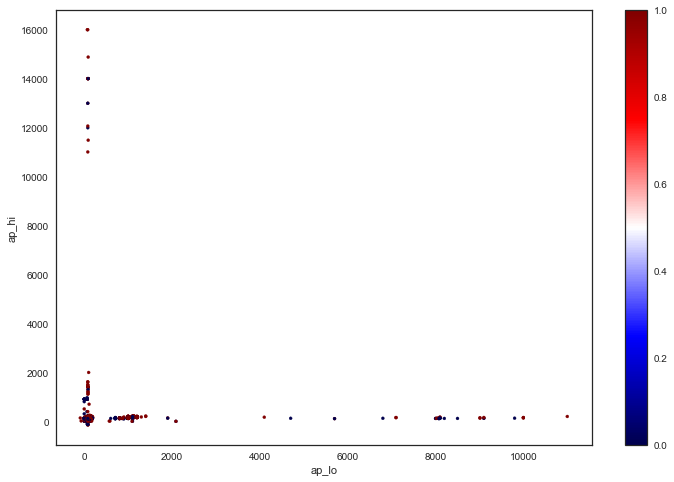

In [58]:
#посмотрим на давление верхнее и нижнее
plt.figure(figsize=(12,8))
plt.scatter(data.ap_lo, data.ap_hi, s=9, c=data.cardio, cmap='seismic')
plt.colorbar()
plt.xlabel('ap_lo')
plt.ylabel('ap_hi')

Как можно интерпретировать график? Что не так с картинкой? Может ли давление быть в районе тысячи и больше? Может ли верхнее давление быть меньше нижнего? 

#### вес и рост

Text(0,0.5,'height')

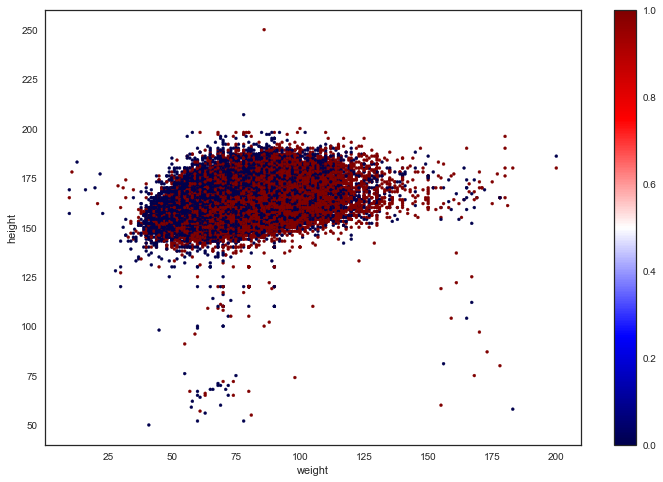

In [59]:
#посмотрим на вес и рост
plt.figure(figsize=(12,8))
plt.scatter(data.weight, data.height, s=9, c=data.cardio, cmap='seismic')
plt.colorbar()
plt.xlabel('weight')
plt.ylabel('height')

Что не так здесь и сразу бросается в глаза? Обратите внимание на точки в правом углу? Как должен выглядеть человек с весом 180 кг и ростом 60 см? Можем ли мы просто выкинуть такое наблюдение или такое возможно? 

### Способы нахождения аномалий?

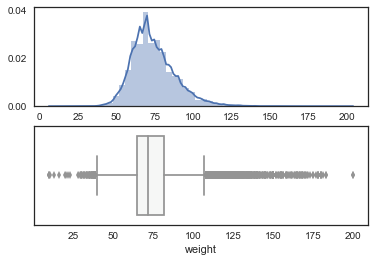

In [60]:
#ящик с усами (диаграмма размаха)
f,axes = plt.subplots(2, 1)

sns.boxplot(data.weight, palette="PRGn", ax=axes[1])
sns.distplot(data.weight, ax=axes[0])

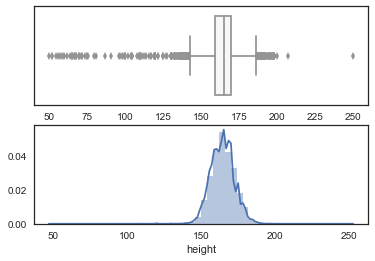

In [61]:
f, axes = plt.subplots(2, 1)

sns.boxplot(data.height, palette="PRGn", ax=axes[0])
sns.distplot(data.height, ax=axes[1])

In [62]:
sns.boxplot?


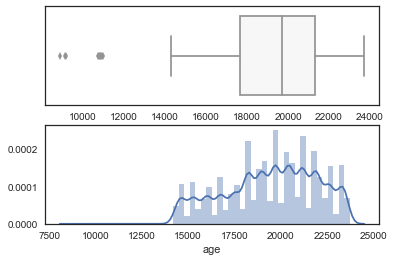

In [65]:
f, axes = plt.subplots(2, 1)

sns.boxplot(data.age, palette="PRGn", ax=axes[0])
sns.distplot(data.age, ax=axes[1])

Как трактовать? Какие точки на верхнем из двух графиков соответствуют выбросам?

In [71]:
d = [180,147,200,150,130,165]
numpy.mean(d)

162.0

In [72]:
sorted(d)

[130, 147, 150, 165, 180, 200]

In [73]:
numpy.median(d)

157.5

In [74]:
d = [180,147,200,150,130,165,335]

In [75]:
numpy.mean(d)

186.71428571428572

In [76]:
numpy.median(d)

165.0

### Произведем очистку данных, а затем посмотрим на те же графики

In [78]:
# Давление
mask = (data.ap_hi == 1) & (data.ap_lo > 100)
data.loc[mask, 'ap_hi'] = (
    data.loc[mask, 'ap_hi']*100 + (data.loc[mask, 'ap_lo']//100))
data.loc[mask, 'ap_lo'] = (data.loc[mask, 'ap_lo'].mod(100)//10)*10
data.loc[data.ap_hi == 14900, 'ap_hi'] = 140
data.loc[data.ap_hi > 4000, 'ap_hi'] //= 100
mask = (data.ap_lo == 0) & (data.ap_hi >= 300)
data.loc[mask, 'ap_hi'], data.loc[mask, 'ap_lo'] = data.loc[mask, 'ap_hi']//10, data.loc[mask, 'ap_hi'].mod(10)*10
data.loc[data.ap_hi.isin([400, 401]), 'ap_hi'] = 140
data.loc[data.ap_hi == 701, 'ap_hi'] = 170
data.loc[data.ap_hi == 1420, 'ap_hi'] = 140
data.loc[data.ap_hi == 1620, 'ap_hi'] = 160
data.loc[data.ap_hi.isin([1130,1110]), 'ap_hi'] = 110
data.loc[data.ap_hi == 960, 'ap_hi'] = 90
data.loc[data.ap_hi >= 300, 'ap_hi'] //= 10

data.loc[data.ap_lo == 4100, 'ap_lo'] = 140
data.loc[data.ap_lo == 10000, 'ap_lo'] = 100
data.loc[data.ap_lo == 5700, 'ap_lo'] = 75
data.loc[data.ap_lo == 6800, 'ap_lo'] = 80
data.loc[data.ap_lo == 4700, 'ap_lo'] = 70
data.loc[data.ap_lo == 1100, 'ap_lo'] = 110

data.loc[data.ap_lo >= 4000, 'ap_lo'] = (data.loc[data.ap_lo >= 4000, 'ap_lo']//1000)*10
data.loc[data.ap_lo == 1900, 'ap_lo'] = 90
data.loc[data.ap_lo == 1211, 'ap_lo'] = 120
data.loc[data.ap_lo >= 1200, 'ap_lo'] //= 10
data.loc[data.ap_lo >= 1100, 'ap_lo'] = (data.loc[data.ap_lo >= 1100, 'ap_lo']//100)*10 
data.loc[data.ap_lo >= 1000, 'ap_lo'] = 100
data.loc[data.ap_lo == 570, 'ap_lo'] = 75
data.loc[data.ap_lo.isin([850, 585]), 'ap_lo'] = 85
data.loc[data.ap_lo >= 300, 'ap_lo'] = (data.loc[data.ap_lo >= 300, 'ap_lo']//100)*10 

data.loc[data.ap_hi < 0, 'ap_hi'] *= -1
data.loc[data.ap_lo < 0, 'ap_lo'] *= -1
mask = (data.ap_hi == 1) & (data.ap_lo <= 100)
data.loc[mask, 'ap_hi'], data.loc[mask, 'ap_lo'] = data.loc[mask, 'ap_hi']*100 + data.loc[mask, 'ap_lo'], 80

mask = (data.ap_hi == 10) & (data.ap_lo.isin([0, 160]))
data.loc[mask, 'ap_hi'], data.loc[mask, 'ap_lo'] = 100, 60
mask = (data.ap_hi == 11) & (data.ap_lo == 120)
data.loc[mask, 'ap_hi'], data.loc[mask, 'ap_lo'] = 120, 80
mask = (data.ap_hi == 11) & (data.ap_lo == 57)
data.loc[mask, 'ap_hi'], data.loc[mask, 'ap_lo'] = 115, 70
mask = (data.ap_hi == 12) & (data.ap_lo.isin([0, 140]))
data.loc[mask, 'ap_hi'], data.loc[mask, 'ap_lo'] = 120, 80
mask = (data.ap_hi == 13) & (data.ap_lo == 58)
data.loc[mask, 'ap_hi'], data.loc[mask, 'ap_lo'] = 135, 80
mask = (data.ap_hi == 13) & (data.ap_lo == 0)
data.loc[mask, 'ap_hi'], data.loc[mask, 'ap_lo'] = 130, 80
data.loc[data.ap_hi.between(10, 24), 'ap_hi'] *= 10
data.loc[data.ap_hi == 7, 'ap_hi'] = 120

mask = (data.ap_lo == 0) & (data.ap_hi == 108)
data.loc[mask, 'ap_hi'], data.loc[mask, 'ap_lo'] = 100, 80
mask = (data.ap_lo == 0) & (data.ap_hi == 118)
data.loc[mask, 'ap_hi'], data.loc[mask, 'ap_lo'] = 110, 80
mask = (data.ap_lo == 0) & (data.ap_hi.isin([90, 80]))
data.loc[mask, 'ap_hi'], data.loc[mask, 'ap_lo'] = 120, data.loc[mask, 'ap_hi']
mask = (data.ap_lo == 0) & (data.ap_hi.isin([138, 117, 149, 148]))
data.loc[mask, 'ap_hi'], data.loc[mask, 'ap_lo'] = (data.loc[mask, 'ap_hi']//10)*10, data.loc[mask, 'ap_hi'].mod(10)*10
mask = (data.ap_lo == 0) & (data.ap_hi == 50)
data.loc[mask, 'ap_hi'], data.loc[mask, 'ap_lo'] = 150, 100
data.loc[data.ap_lo == 0, 'ap_lo'] = 80

data.loc[data.ap_hi <= 50, 'ap_hi'] += 100
mask = (data.ap_hi <= 70) & (data.ap_lo.between(100, 120))
data.loc[mask, 'ap_hi'], data.loc[mask, 'ap_lo'] = data.loc[mask, 'ap_lo'], data.loc[mask, 'ap_hi']
mask = (data.ap_hi == 70) & (data.ap_lo == 15)
data.loc[mask, 'ap_hi'], data.loc[mask, 'ap_lo'] = 170, 150

mask = (data.ap_hi == 80) & (data.ap_lo.between(100, 170))
data.loc[mask, 'ap_hi'], data.loc[mask, 'ap_lo'] = data.loc[mask, 'ap_lo'], data.loc[mask, 'ap_hi']
data.loc[(data.ap_hi == 80) & (data.ap_lo == 69), 'ap_lo'] = 60

mask = (data.ap_hi == 90) & (data.ap_lo.between(100, 170))
data.loc[mask, 'ap_hi'], data.loc[mask, 'ap_lo'] = data.loc[mask, 'ap_lo'], data.loc[mask, 'ap_hi']
data.loc[(data.ap_hi == 100) & (data.ap_lo == 98), 'ap_hi'] = 150
mask = (data.ap_hi == 100) & (data.ap_lo.between(100, 170))
data.loc[mask, 'ap_hi'], data.loc[mask, 'ap_lo'] = data.loc[mask, 'ap_lo'], data.loc[mask, 'ap_hi']
data.loc[(data.ap_hi == 120) & (data.ap_lo == 150), 'ap_lo'] = 50
data.loc[(data.ap_hi == 130) & (data.ap_lo == 190), 'ap_lo'] = 90
data.loc[(data.ap_hi == 110) & (data.ap_lo == 170), 'ap_lo'] = 70
data.loc[(data.ap_hi == 116) & (data.ap_lo == 120), 'ap_hi'] = 110
mask = (data.ap_hi >= 100) & (data.ap_lo > data.ap_hi)
data.loc[mask, 'ap_hi'], data.loc[mask, 'ap_lo'] = data.loc[mask, 'ap_lo'], data.loc[mask, 'ap_hi']
mask = (data.ap_lo >= 100) & (data.ap_lo > data.ap_hi)
data.loc[mask, 'ap_hi'], data.loc[mask, 'ap_lo'] = data.loc[mask, 'ap_lo'], data.loc[mask, 'ap_hi']
mask = (data.ap_hi == 85) & (data.ap_lo == 95)
data.loc[mask, 'ap_hi'], data.loc[mask, 'ap_lo'] = 80, 50 

data.loc[data.ap_lo == 1, 'ap_lo'] = 100
data.loc[data.ap_lo.isin([6, 7, 8, 9]), 'ap_lo'] *= 10
data.loc[(data.ap_hi == 128) & (data.ap_lo == 20), 'ap_hi'] = 120
data.loc[(data.ap_lo == 20) & (data.ap_hi.between(100, 180)), 'ap_lo'] = 80
data.loc[data.ap_lo == 10, 'ap_lo'] = 100
data.loc[(data.ap_lo == 19) & (data.ap_hi == 120), 'ap_lo'] = 80
data.loc[(data.ap_lo < 30), 'ap_lo'] *= 10
data.loc[(data.ap_hi == 120) & (data.ap_lo == 30), 'ap_lo'] = 80
data.loc[(data.ap_lo == 30), 'ap_lo'] += 100
mask = (data.ap_hi == 103) & (data.ap_lo == 61)
data.loc[mask, 'ap_hi'], data.loc[mask, 'ap_lo'] = 100, 60
data.loc[data.ap_hi == data.ap_lo, 'ap_lo'] = 70

# HEIGHT-WEIGHT
data.loc[(data.height == 169) & (data.weight == 16.3), 'weight'] = 63
data.loc[(data.weight.between(10, 15)), 'weight'] *= 10
data.loc[data.weight.between(20, 29), 'weight'] += 100
data.loc[(data.height == 170) & (data.weight == 31) & (data.gender == 1), 'weight'] += 100
data.loc[(data.height == 170) & (data.weight == 165), 'weight'] = 65
data.loc[(data.height == 186) & (data.weight == 200), 'weight'] = 100
mask = (data.weight.between(100, 200)) & (data.height < 100)
data.loc[mask, 'weight'], data.loc[mask, 'height'] = data.loc[mask, 'height'], data.loc[mask, 'weight'] 
data.loc[(data.height > 240), 'height'] -= 100
data.loc[(data.height < 80), 'height'] += 100
data.loc[(data.height == 119) & (data.weight == 155), 'weight'] = 55
data.loc[(data.height == 128) & (data.weight == 128), 'weight'] = 76
data.loc[(data.height < 150) & (data.weight >= 130), 'weight'] -= 100
data.loc[(data.weight > 140) & (data.ap_hi <= 100), 'weight'] -= 100
data.loc[(data.weight == data.height) & (data.gender == 0), 'weight'] = 70
data.loc[(data.weight == data.height) & (data.gender == 1), 'weight'] = 75
data.loc[(data.weight.between(160, 199)) & (data.ap_hi <= 120) & (data.gender), 'weight'] -= 100
data.loc[(data.weight.between(140, 199)) & (data.ap_hi <= 120) & (data.gender == 0) & (data.height < 175), 'weight'] -= 100

data.loc[(data.weight == 168) & (data.height == 174), 'weight'] = 68

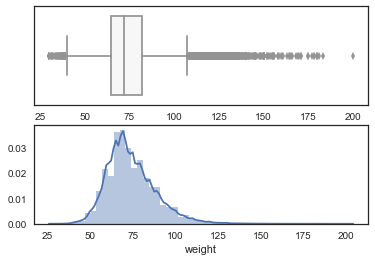

In [80]:
#ящик с усами (диаграмма размаха)
f, axes = plt.subplots(2, 1)


sns.boxplot(data.weight, palette="PRGn", ax=axes[0])
sns.distplot(data.weight, ax=axes[1])

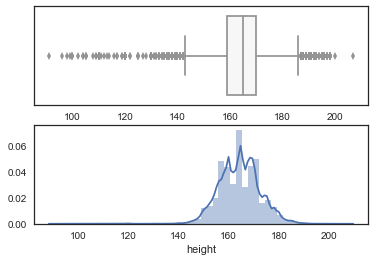

In [81]:
f, axes = plt.subplots(2, 1)

sns.boxplot(data.height, palette="PRGn", ax=axes[0])
sns.distplot(data.height, ax=axes[1])

In [82]:
data.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,smoke_and_alco
age,1.000000,-0.021165,-0.083995,0.058503,0.209468,0.157119,0.154545,0.099736,-0.045355,-0.029610,-0.011285,0.242662,-0.036419
gender,-0.021165,1.000000,0.512693,0.162509,0.063907,0.071690,-0.034142,-0.016969,0.336993,0.168775,0.008319,0.009094,0.192957
height,-0.083995,0.512693,1.000000,0.309817,0.016072,0.033755,-0.054403,-0.019214,0.192751,0.096629,-0.009285,-0.013838,0.112807
weight,0.058503,0.162509,0.309817,1.000000,0.273367,0.257659,0.141143,0.107067,0.069248,0.067957,-0.019238,0.182016,0.036518
ap_hi,0.209468,0.063907,0.016072,0.273367,1.000000,0.743838,0.195093,0.092731,0.029177,0.036003,0.000409,0.432754,0.022311
ap_lo,0.157119,0.071690,0.033755,0.257659,0.743838,1.000000,0.162525,0.073671,0.027757,0.037108,-0.000753,0.349895,0.021547
cholesterol,0.154545,-0.034142,-0.054403,0.141143,0.195093,0.162525,1.000000,0.447808,0.012679,0.031838,0.010655,0.219556,0.000271
gluc,0.099736,-0.016969,-0.019214,0.107067,0.092731,0.073671,0.447808,1.000000,-0.002162,0.008292,-0.006140,0.086637,-0.009441
smoke,-0.045355,0.336993,0.192751,0.069248,0.029177,0.027757,0.012679,-0.002162,1.000000,0.334925,0.029427,-0.016814,0.527986
alco,-0.029610,0.168775,0.096629,0.067957,0.036003,0.037108,0.031838,0.008292,0.334925,1.000000,0.024100,-0.010252,0.686673


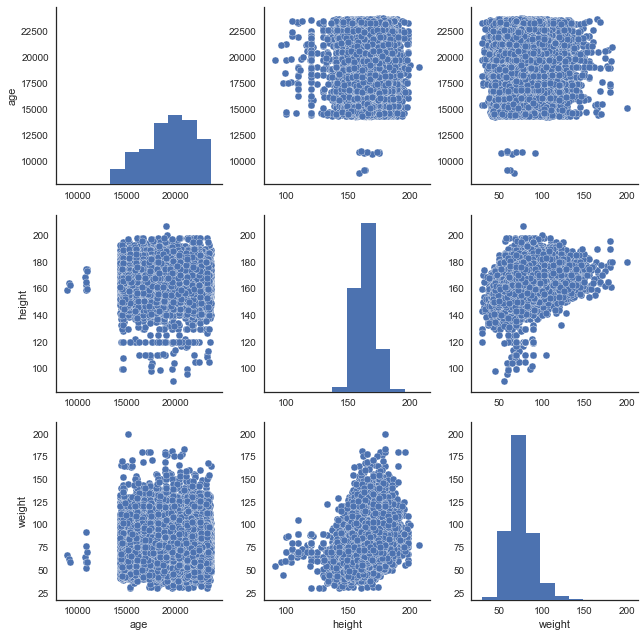

In [83]:
#график корреляции между каждой парой признаков
sns.pairplot(data[['age', 'height', 'weight']], size=3)

In [84]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,smoke_and_alco
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,19464.864590,1.350820,164.383590,74.156374,127.073210,81.596950,1.367220,1.225330,0.088270,0.054140,0.804330,0.500000,0.026280
std,2470.428376,0.477229,7.990407,14.265016,17.020229,9.719903,0.679922,0.570543,0.283689,0.226295,0.396718,0.500003,0.159968
min,8865.000000,1.000000,91.000000,30.000000,60.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17662.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,19700.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.500000,0.000000
75%,21324.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,23713.000000,2.000000,207.000000,200.000000,240.000000,200.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Посмотрим на распределения признаков в наборе данных

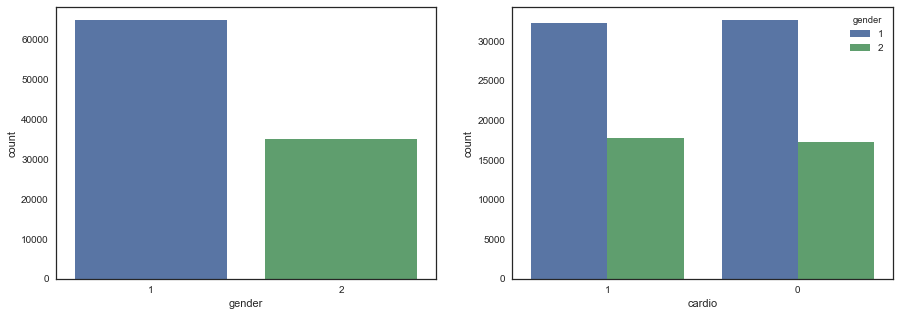

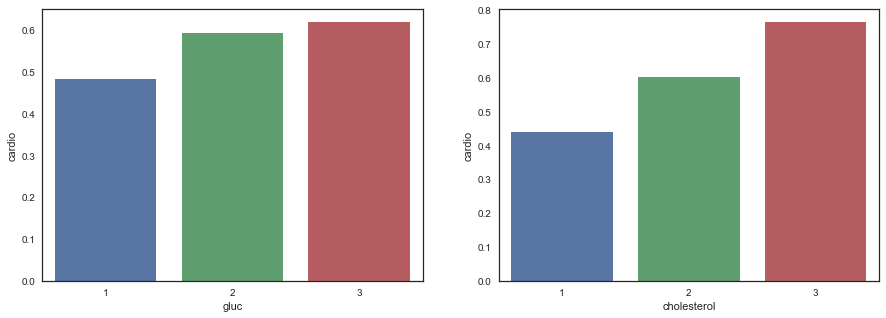

In [86]:
#сколько мужчин, женщин и соотношение cardio 0/1 у мужчин и женщин
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
fig, (axis3,axis4) = plt.subplots(1,2,figsize=(15,5))

sns.countplot(x='gender', data=data, ax=axis1)
sns.countplot(x='cardio', hue="gender", data=data, order=[1,0], ax=axis2)

data_gluc = data[["gluc", "cardio"]].groupby(['gluc'],as_index=False).mean()
sns.barplot(x='gluc', y='cardio', data=data_gluc,order=[1,2,3],ax=axis3)

data_gluc = data[["cholesterol", "cardio"]].groupby(['cholesterol'],as_index=False).mean()
sns.barplot(x='cholesterol', y='cardio', data=data_gluc,order=[1,2,3],ax=axis4)

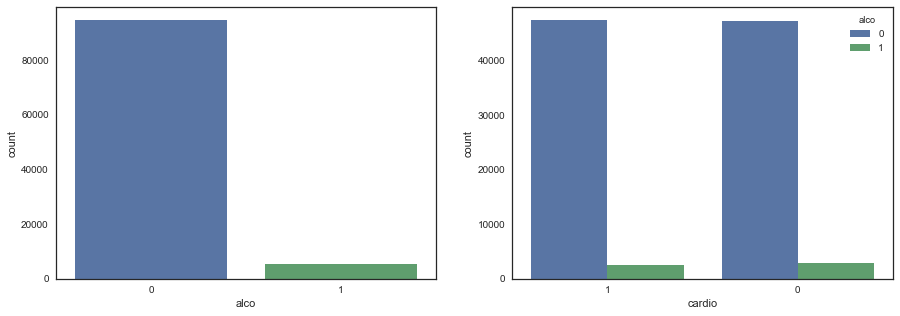

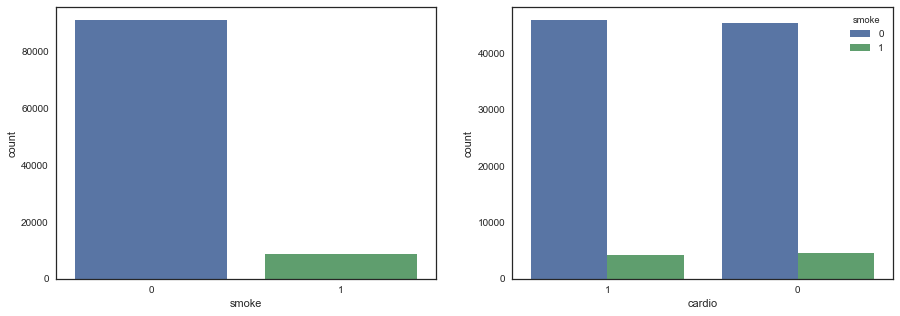

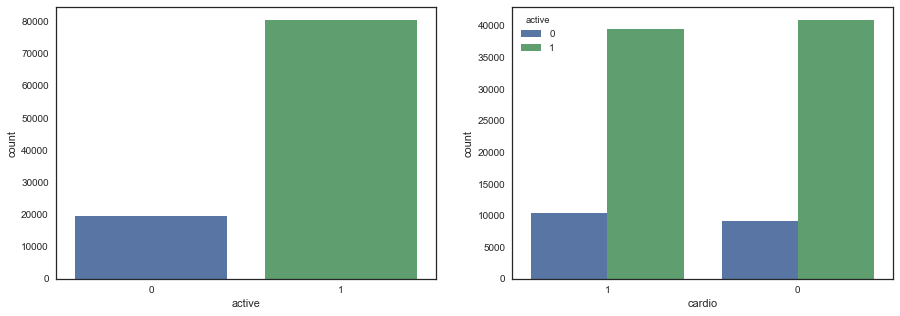

In [87]:
#сколько больных в зависимости от курения
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))

sns.countplot(x='alco', data=data, ax=axis1)
sns.countplot(x='cardio', hue="alco", data=data, order=[1,0], ax=axis2)

#в зависимости от алкоголя
fig, (axis3,axis4) = plt.subplots(1,2,figsize=(15,5))

sns.countplot(x='smoke', data=data, ax=axis3)
sns.countplot(x='cardio', hue="smoke", data=data, order=[1,0], ax=axis4)

#в зависимости от того, ведет ли пациент активный образ жизни
fig, (axis5,axis6) = plt.subplots(1,2,figsize=(15,5))

sns.countplot(x='active', data=data, ax=axis5)
sns.countplot(x='cardio', hue="active", data=data, order=[1,0], ax=axis6)

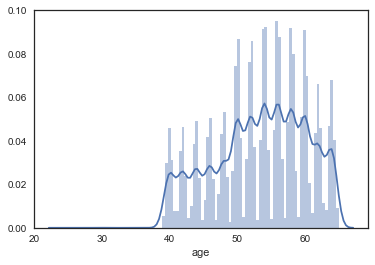

In [88]:
#посмотрим на возраст, но сначала преобразуем его, разделив на 365.25
data['age'] = data['age']/365.25
sns.distplot(data['age'], label="Age", bins=100)

Text(0,0.5,'ap_hi')

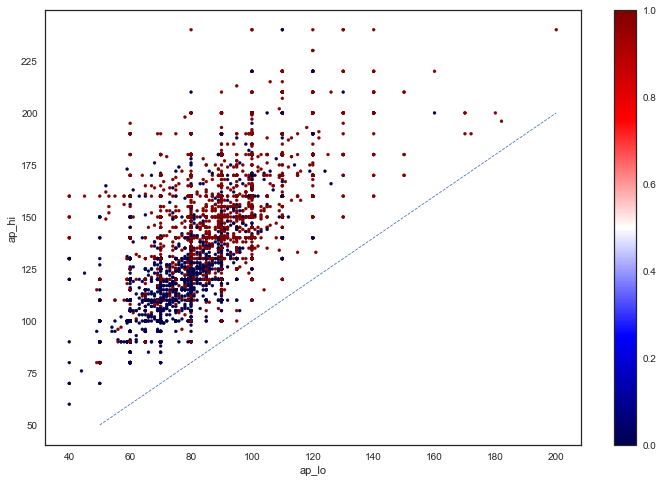

In [91]:
#посмотрим на давление верхнее и нижнее
plt.figure(figsize=(12,8))
plt.scatter(data.ap_lo, data.ap_hi, s=9, c=data.cardio, cmap='seismic')
plt.colorbar()
plt.plot([50, 200], [50, 200], '--', linewidth=0.8)
plt.xlabel('ap_lo')
plt.ylabel('ap_hi')

Видно, что верхнее давление строго больше нижнего (хотя в оригинальном наборе данных бывало и наоборот). Данный график позволяет оценить насколько корректно мы почистили данные.

### создадим новые признаки и посмотрим графики для них

In [92]:
#индекс массы тела
data['bmi'] = pd.qcut(data.weight/(data.height/100)**2, 25, labels=False)

#разница между верхним и нижним давлением
data['ap_hi_ap_lo_diff'] = data['ap_hi'] - data['ap_lo']

#является ли давление нормальным (идеальным)
data['ap_normal'] = ((data.ap_hi.between(85, 125)) & (data.ap_lo.between(55, 85))).astype('int')

In [93]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,smoke_and_alco,bmi,ap_hi_ap_lo_diff,ap_normal
id,,,,,,,,,,,,,,,,
0,50.357290,2,168.0,62.0,110,80,1,1,0,0,1,0,0,2,30,1
1,55.381246,1,156.0,85.0,140,90,3,1,0,0,1,1,0,22,50,0
2,51.627652,1,165.0,64.0,130,70,3,1,0,0,0,1,0,5,60,0
3,48.249144,2,169.0,82.0,150,100,1,1,0,0,1,1,0,16,50,0
4,47.841205,1,156.0,56.0,100,60,1,1,0,0,0,0,0,3,40,1


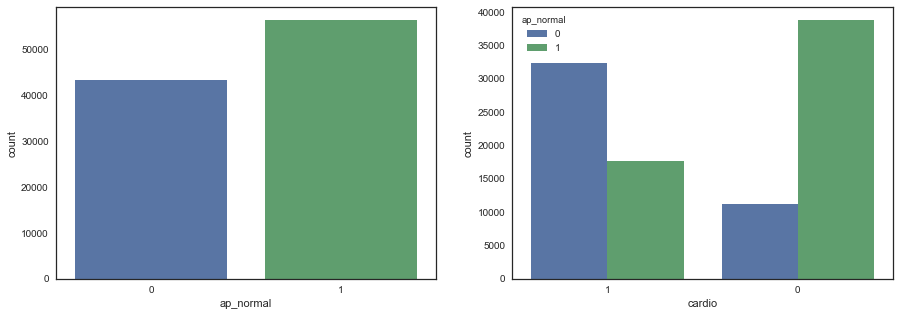

In [94]:
#посмотрим, сколько у нас тех, у кого давление в норме, а также посмотрим, сколько среди них больных
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))

sns.countplot(x='ap_normal', data=data, ax=axis1)
sns.countplot(x='cardio', hue="ap_normal", data=data, order=[1,0], ax=axis2)

Как можно предположить, мы видим, что среди больных больше тех, у кого давление не в норме.

### Основные моменты

#### Пропуски:
    * удаляем наблюдения
    * заполняем мерами центральной тенденции
    * с помощью алгоритмов машинного обучения - находим "похожие" наблюдения
    
#### Аномальные значения:
    * естественной природы
    * ошибки вычислений и измерений
    * ошибки при вводе (оцифровке)
    

